파이썬 머신러닝 완벽가이드 `ch4. 1~5 (2 제외) pg. 183~227 (201~211 제외)` 필사

# 01. 분류(Classification)의 개요

- 지도학습
  - 학습데이터로 주어진 데이터의 피쳐, 레이블값을 학습하여 모델 생성
- 나이브 베이즈, 로지스틱 회귀, 결정트리, 서포트 벡터 머신, 최소 근점 알고리즘, 앙상블, ...
- 앙상블 방법(Ensemble Method)
  - 서로 다른/같은 알고리즘 결합
  - ex) 결정트리
    - 데이터 사전 가공의 영향 小
    - 복잡한 규칙구조로 인한 과적합 발생 → 예측 성능 저하
  - 배깅
    - ex) Random Forest
  - 부스팅
    - ex) Gradient Boosting, XgBoost, LightGBM, ...
  - 스태킹



# 02. 결정트리
- 데이터의 규칙을 학습으로 찾아내 트리 기반의 분류 규칙 생성
  - 규칙 : if/else 가 일반적
- 구조
  - 규칙 노드 : 규칙 조건
    - 정보 균일도 높은 데이터 세트 먼저 선택
      - 정보이득 지수 : `1 - 엔트로피 지수`. 정보이득 높은 속성 기준으로 분할
      - 지니계수 : 지니계수 낮을 수록 데이터 균일도 높음. 지니계수 낮은 속성 기준으로 분할
  - 리프 노드 : 결정된 클래스 값
  - 서브 트리 : 규칙 조건마다 생성
  - 트리 깊이 깊어질 수록 예측 성능 저하될 가능성 상승
- DecisionTreeClassifier
  - sklearn
  - 지니 계수 이용

## 1. 결정 트리 모델의 특징

1) 장점
- 정보 균일도 → 쉽고 직관적인 알고리즘
- 명확한 룰 → 규칙 노드, & 리프 노드 생성과정 시각화 가능
- 전처리 불필요

2) 단점
- 과적합 → 정확도 감소
- 복잡한 학습 모델 생성하는 경우 多 → 예측 성능 감소
  - 트리 크기 사전 제한 필요

## 2. 결정 트리 파라미터

1) DecisionTreeClassifier(분류), DecisionTreeRegressor(회귀)

2) CART 기반

3) min_samples_split : 노드 분할 위한 최소한의 샘플 데이터 수

4) min_samples_leaf : 말단 노드가 되기 위한 최소한의 샘플 데이터 수

5) max_features : 분할에 고려할 최대 피처 개수. `default=None(전체 피처 선정)`

6) max_depth : 트리 최대 깊이

7) max_leaf_nodes : 말단 노드 최대 개수

## 3. 결정 트리 모델의 시각화

1) `Graphviz` 패키지 사용
  - 그래프 기반 dot 파일로 기술된 이미지 시각화 패키지
  - sklearn의 export_graphviz() API 제공
    - 인자 : 학습 완료된 Estimator, 피처 이름 리스트, 레이블 이름 리스트


In [1]:
# 붓꽃 데이터 세트 DecisionTreeClassifier로 학습 후 트리 확인

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터 로딩 후 학습/테스트 데이터 세트 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [2]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일 지정
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,
                feature_names = iris_data.feature_names, impurity=True, filled=True)

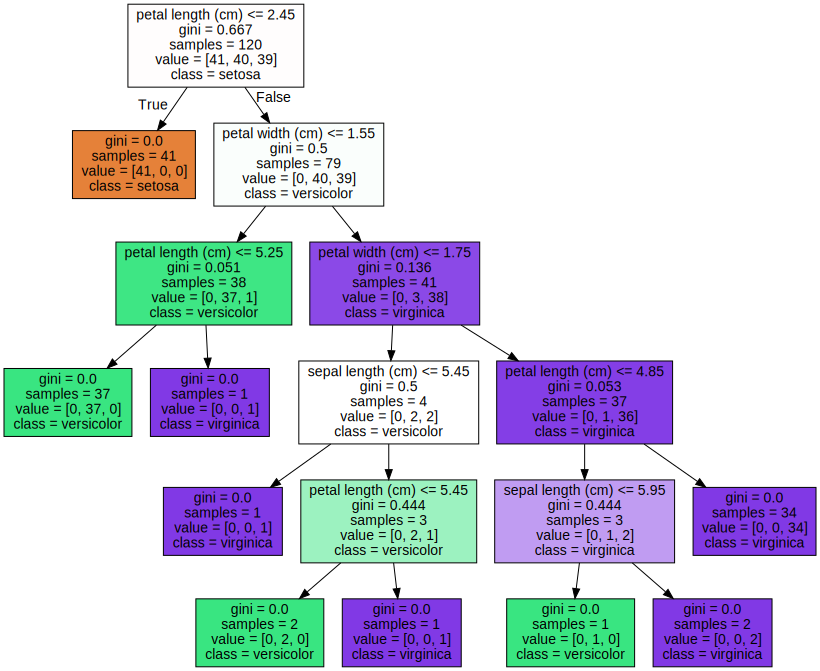

In [3]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f :
  dot_graph = f.read()
graphviz.Source(dot_graph)

2) 트리 구성
- 1번 노드
  - samples=120 : 전체 데이터 수 120개
  - value=[41, 40, 39] : setosa 41, versicolor 40, virginica 39개
  - gini=0.667 : 지니계수 0.667
  - petal length<=2.45 : 자식노드 생성 규칙
  - class=setosa : 하위노드 가지는 경우, setosa의 개수가 41개로 가장 多
- 각 노드 색 : 붓꽃 데이터 레이블 값
  - 주황=0, 초록=1, 보라=2
  - 색 짙어질 수록 지니계수 낮고 해당 레이블 데이터 多


3) 트리 변화
- mex_depth 하이퍼 파라미터 변경
  - 결정 트리의 최대 깊이 제한
  - 제한 없음 --> 3개 : 최대 깊이 줄어들어 더 간단한 결정트리
- min_samples_split 하이퍼 파라미터 변경
  - 자식 규칙 노드 분할하기 위한 최소한의 샘플 데이터 개수
  - 4로 설정 --> 3개 이하로 남았을 경우 더이상 분할 진행 x
- min_samples_leaf 하이퍼 파라미터 변경
  - 리프 노드가 될 수 있는 샘플 데이터 건수의 최솟값 지정
  - defulat=1 : 단독 클래스로 구성 / 데이터 1개로 구성된 경우 리프노드
  - 숫자 높이는 경우 보다 간결한 결정트리 구성

4) `feature_importances_`
- 결정 트리 알고리즘 학습에 중요한 피처의 역할 지표
- ndarray 형태로 피처 순서대로 값 할당
- 값 높을 수록 해당 feature 중요도 大

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


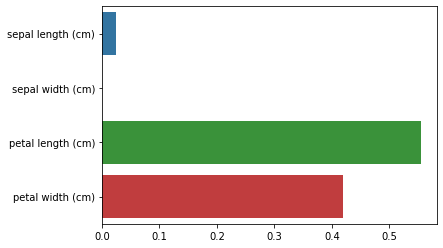

In [4]:
# featrue_importances_ 속성으로 피쳐별 중요도 값 매핑 후 막대그래프로 표현

import seaborn as sns
import numpy as np

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature 별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name, value))

# feature importance column 별로 시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

`petal_length` 중요도가 제일 大

## 2. 결정 트리 과적합(Overfitting)
1) make_classification()
  - 분류 위한 테스트용 데이터 생성
  - 피처 데이터 세트, 클래스 레이블 데이터 세트 반환

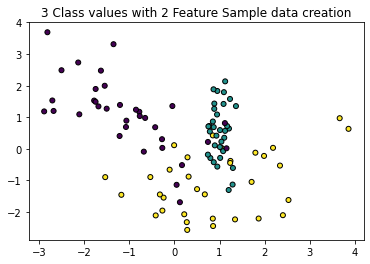

In [5]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title("3 Class values with 2 Feature Sample data creation")

# 2차원 시각화를 위해 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor='k')

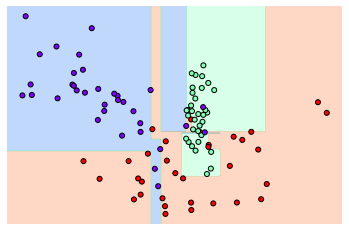

In [6]:
# X_features, y_labels 데이터 세트 기반으로 결정트리 학습
# visualize_boundary() : 결정트리모델이 데이터 분류하는 기준 확인 위한 함수

from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화.

import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)
    
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

이상치까지 분류하기 위해 분할 자주 발생 → 경계 생성 多 → 예측 정확도 감소
∴  `min_samples_leaf` 하이퍼 파라미터 조절

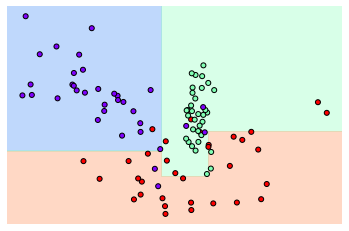

In [7]:
# min_samples_leaf=6으로 트리 생성 조건 제약한 결정 경계 시각화

dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

이상치에 크게 반응하지 않고 일반화된 뷴류 규칙에 따라 분류

## 3. 결정 트리 실습 - 사용자 행동 인식 데이터 세트

1) UCI 머신러닝 리포지토리 사용자 행동 인식 데이터 세트 <br/>
- 30명에게 스마트폰 센서 장착한 뒤 사람의 동작과 관련된 여러 가지 피처 수집한 데이터
- 수집된 피처세트 기반으로 결정트리 이용해 동작 종류 예측

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# feataures.txt 파일 : 피처 이름 index / 피처 명 공백으로 분리
feature_name_df = pd.read_csv("features.txt", sep='\s+', header=None, names = ['column_index', 'column_name'])

# 피처명 index 제거 후 피처명만 리스트 객체로 생성, 샘플 10개 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print("전체 피처명에서 10개만 추출:", feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [9]:
# 중복된 피처명 탐색

feature_dup_df = feature_name_df.groupby("column_name").count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [10]:
# 원본 피처명에 _1, _2 추가 부여해 새로운 피처명 가지는 get_new_feature_name_df() 생성

def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby("column_name").cumcount(), columns=['dup_cnt'])
  feature_dup_df = feature_dup_df.reset_index()
  new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
  new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)
  new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
  return new_feature_name_df

In [11]:
def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [12]:
print("## 학습 피처 데이터셋 info()")
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [13]:
y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [15]:
# tree depth가 예측 정확도에 주는 영향

from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [16]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성. 
# cv_resulsts_ : cv 세트에 하이퍼 파라미터를 순차적으로 입력했을 때의 성능수치 가짐
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


max_depth=8일 때 test score 높고 그 뒤로 감소하는 경향

In [17]:
max_depths = [ 6, 8 ,10, 12, 16 ,20, 24]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

max_depth = 6 정확도: 0.8558
max_depth = 8 정확도: 0.8707
max_depth = 10 정확도: 0.8673
max_depth = 12 정확도: 0.8646
max_depth = 16 정확도: 0.8575
max_depth = 20 정확도: 0.8548
max_depth = 24 정확도: 0.8548


test data : max_depth=8일 때 정확도 제일 높음

In [18]:
# max_depth와 min_samples split 변경하며 정확도 성능 튜닝

params = {
    'max_depth' : [ 8 , 12, 16 ,20], 
    'min_samples_split' : [16,24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [19]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

결정 트리 예측 정확도:0.8717


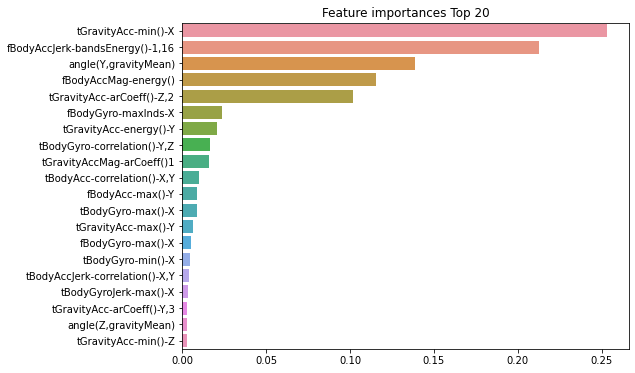

In [20]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns  )
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

중요도 top5 피처들이 규칙 생성에 중요한 영향

# 03. 앙상블 학습

## 1. 앙상블 학습 개요
1) 앙상블 학습 : 여러 개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종예측을 도출하는 기법 <br/>
2) 대부분의 정형 데이터 분류 시 뛰어난 성능 <br/>
3) ex) 랜덤포레스트, 그래디언트 부스팅 알고리즘 <br/>
4) 유형
  - Voting : 같은 분류기, 다른 데이터 샘플링
  - Bagging : 다른 알고리즘 가진 분류기 결합
    - ex) Random Forest
  - Boosting : 여러 개의 분류기가 순차적으로 학습, 앞의 학습한 분류기가 틀린 데이터에 대해 올바르게 예측하도록 다음 분류기에는 가중치 부여
    - ex) XGBoost, LightGBM

## 2. Voting
1) Hard Voting : 다수결
2) Soft Voting : 레이블 값 결정 확률 평균 中 가장 높은 레이블 값 선정

## 3. 보팅 분류기
1) 사이킷런 VotingClassifier 클래스 : 보팅 방식의 앙상블 구현


In [21]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [22]:
# 개별 모델은 로지스틱 회귀와 KNN 임. 
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


# 04. 랜덤 포레스트
## 1. 랜덤 포레스트의 개요 및 실습
1) 배깅의 대표적인 알고리즘 <br/>
2) 비교적 빠른 수행 속도, 높은 예측 성능 <br/>
3) 결정 트리 기반 알고리즘 <br/>
4) 부트 스트래핑 : 전체 데이터에서 일부가 중첩되게 여러 개의 데이터 세트를 분리 <br/>
5) 사이킷런 RandomForestClassifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


## 2. 랜덤 포레스트 하이퍼 파라미터 및 튜닝
1) GridSearchCV 이용
  - n_estimators=100, CV=2로 설정
  - 다른 하이퍼파리미터 최적화 후 n_estimator=300으로 증가
2) CPU 병렬 처리 가능
  - 멀티 코어 환경 : RandomForestClassifier, GridSearchCV 생성 시 n_jobs=-1 추가 시 모든 CPU 코어 이용 가능

In [24]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


In [25]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9165


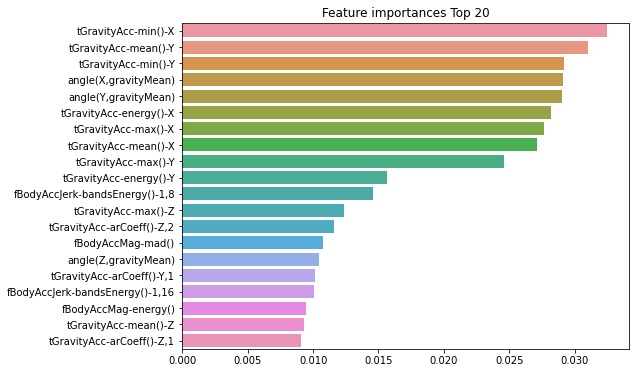

In [26]:
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

# 05. GBM(Gradient Boosting Machine)
## 1. GBM의 개요 및 실습
1) 부스팅 알고리즘 : 여러 개의 약한 학습기 순차적으로 학습-예측하며 잘못 예측한 데이터에 가중치 부여 <br/>
2) ex) AdaBoost <br/>
3) GBM
  - AdaBoost와 유사
  - 경사 하강법으로 가중치 업데이트
  - 사이킷런 GradientBoostingClassifier 클래스 : GBM 기반의 분류 제공
  - 수행 시간 大

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.9386
GBM 수행 시간: 813.8 초 


- 하이퍼 파라미터
  - loss : 경사 하강법에서 사용할 비용 함수 지정
  - learning_rate : 학습률
  - n_estimators : weak_learner의 개수
    - learning_rate와 상호 보완적으로 조합. learning_rate 작게, n_estimator 크게 하면 성능 최대로 좋아지나 수행 시간 大大
  - subsample : weak learner가 학습에 사용하는 데이터의 샘플링 비율

In [ ]:
params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=2)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

In [ ]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행. 
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))